In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import random

from LightCurve import LightCurve as FakeLightCurve
from NoiseModel import NoiseModel

1.34990853373
25191.0458836
13499.0853373
Rebinning to  2
avfsdf 6.0 0.0
0.0 -0.0


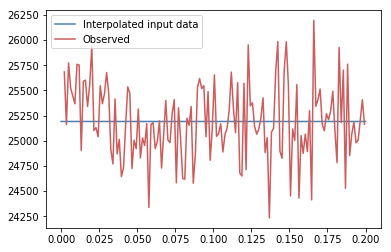

In [2]:
Texp = 2. # minutes
Tmag = 14
optAper = 1.

MyStar = FakeLightCurve(Tmag, Texp*60, optAper)
print MyStar.tot_noise()/MyStar.star_counts()*100

print MyStar.star_counts()

tmp = NoiseModel(Tmag, Texp*60, optAper, unit='ppm')
print tmp.tot_noise()

# these should be the same (percent error)

fake_time = np.linspace(0,0.2,100)
fake_mags = np.ones_like(fake_time)*Tmag

MyStar.debug=False
MyStar.add_data(fake_time, fake_mags, add_noise=True, reject_cosmics=True, rebin=True)

plt.plot(MyStar.Time, MyStar.star_counts(), label='Interpolated input data', c='steelblue')
plt.plot(MyStar.TimeObserved, MyStar.CountsObserved, label='Observed',c='indianred')
plt.legend()
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less


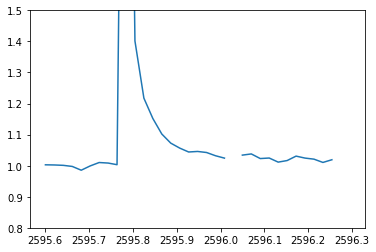

In [3]:
hdulist = fits.open('UCD_data/ktwo220186653-c08_llc.fits')
time = hdulist[1].data['TIME']
flux = hdulist[1].data['PDCSAP_FLUX']
flux2 = (np.array(flux)/np.nanmedian(flux) - 1)*0.1 + 1
flux2[flux2 < 0.9] = 0.9
hdulist.close()

use = (time>2595.6) * (time<2596.3)
plt.plot(time[use], flux2[use])
plt.ylim(0.8,1.5)
plt.show()

In [6]:
Tmag = 14.5
Texp = 2.
optAper = 5.

MyStar = FakeLightCurve(Tmag, Texp*60, optAper)
MyStar.debug=False
MyStar.add_data(time[use], flux2[use], xunit='days', yunit='flux', add_noise=True, reject_cosmics=True, rebin=True)
#plt.xlim(18000,30000)

plt.figure(figsize=(5,3.8))

plt.plot(MyStar.TimeObserved, MyStar.CountsObserved/np.median(MyStar.star_counts()), label='Simulated TESS data (2 min.)')
plt.plot(MyStar.Time, MyStar.star_counts()/np.median(MyStar.star_counts()), label='Interpolated input data')
plt.legend()

#plt.ylim(0,100000)
plt.xlim(0.,0.6)
plt.xlabel("Time (days)", size=14)
plt.ylabel("Flux (e-)", size=14)
#plt.title("Simulated TESS lightcurve at 2 min cadence")
plt.legend()
plt.tick_params(axis='both', direction='in')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
#plt.show()
plt.savefig('outputs/SorcerTESS_UCD/L1flare_Tmag14.5_sim_2min.pdf')

Rebinning to  2
avfsdf 0.0 6.0


AssertionError: 

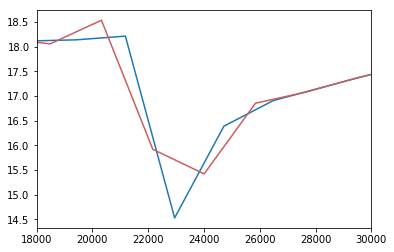

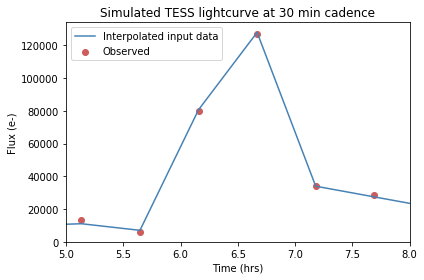

In [229]:
Tmag = 18
Texp = 30.
optAper = 5.

MyStar = FakeLightCurve(Tmag, Texp*60, optAper)
MyStar.debug=True
MyStar.add_data(time[use], flux[use], xunit='days', yunit='flux', add_noise=True, reject_cosmics=False, rebin=True)
plt.xlim(18000,30000)

plt.figure()
plt.scatter(MyStar.TimeObserved/60/60, MyStar.CountsObserved, label='Observed',c='indianred')
plt.plot(MyStar.Time/60/60, MyStar.star_counts(), label='Interpolated input data', c='steelblue')
plt.legend()
plt.xlim(5,8)
#plt.ylim(0,1e5)
plt.xlabel("Time (hrs)")
plt.ylabel("Flux (e-)")
plt.title("Simulated TESS lightcurve at 30 min cadence")
plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig('L1flare_sim_30min.png')

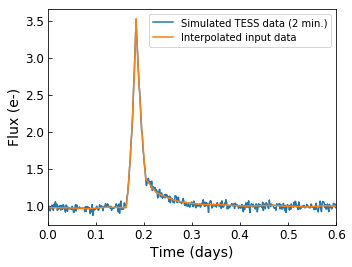

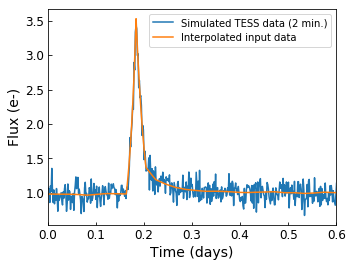

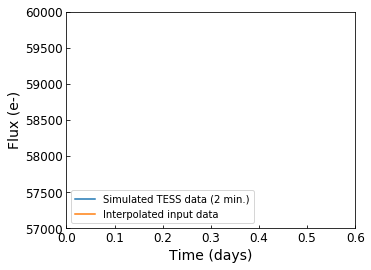

In [13]:
from PyAstronomy.pyasl import binningx0dt

f='kplr009726699-2011240104155_slc.fits'
f='kplr009201463-2011271113734_llc.fits'

hdulist = fits.open('inputs/'+f)
time = hdulist[1].data['TIME']
flux = hdulist[1].data['PDCSAP_FLUX']

r1, dt1 = binningx0dt(time[np.isfinite(flux)], flux[np.isfinite(flux)], dt=0.03, x0=time[0], useBinCenter=False)

def optAper(Tmag):
    
    # this eq. is from the TIC paper. I think it returns to number of pixels in the aperture, which is what I want. 
    Cs = [-0.2592, 7.7410, -77.7918, 274.2898]
    p = np.poly1d(Cs)
    optAper = round(p(Tmag))
    if optAper < 4: 
        optAper = 4
        
    return optAper # noise calculation needs AREA in aperture (in pixels sq.)

plt.plot(time, flux)
plt.plot(r1[::,0], r1[::,1])
#plt.ylim(222000,230000)
#plt.xlim(940,944)

plt.ylim(57000,60000)
#plt.xlim(940,960)
plt.show()

time = r1[::,0]
flux = r1[::,1]

In [19]:
Tmag = 11
Texp = 2.
Aper = optAper(Tmag)
print "using aperture", Aper

MyStar = FakeLightCurve(Tmag, Texp*60, Aper)
MyStar.debug=False
MyStar.add_data(time[100:500], flux[100:500], xunit='days', yunit='flux', add_noise=True, reject_cosmics=True, rebin=True)
#plt.xlim(18000,30000)

plt.figure(figsize=(5,3.5))

plt.scatter(MyStar.TimeObserved, MyStar.CountsObserved/1e4, c='b', s=5, alpha=0.1, label='Simulated 2 min. TESS data')
plt.plot(MyStar.Time, MyStar.star_counts()/1e4, c='k', lw=1, label='Interpolated input data')

plt.ylim(392500/1e4,410000/1e4)
#plt.xlim(0.,0.6)
plt.xlabel("Time (days)", size=13)
plt.ylabel("Flux ($10^{4}$ e-)", size=13)
#plt.title("Simulated TESS lightcurve at 2 min cadence")
plt.legend(loc='upper left')
plt.tick_params(axis='both', direction='in')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
#plt.show()
plt.savefig('outputs/MEarth/KIC9201463_2min.pdf')

using aperture 10.0
Rebinning to  2
avfsdf 6.0 0.0
3.0 -3.0


using aperture 10.0
Rebinning to  2
avfsdf 90.0 0.0
59.0 -59.0


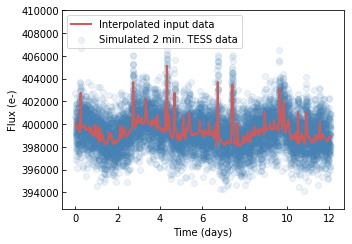

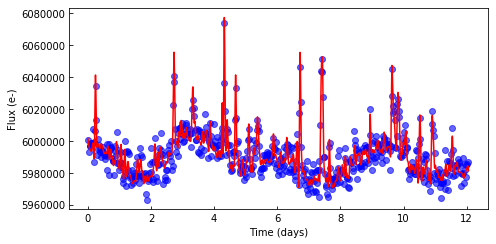

In [48]:
Tmag = 11
Texp = 30.
Aper = optAper(Tmag)
print "using aperture", Aper

MyStar = FakeLightCurve(Tmag, Texp*60, Aper)
MyStar.debug=False
MyStar.add_data(time[100:500], flux[100:500], xunit='days', yunit='flux', add_noise=True, reject_cosmics=True, rebin=True)
#plt.xlim(18000,30000)

plt.figure(figsize=(7,3.5))

plt.scatter(MyStar.TimeObserved, MyStar.CountsObserved, c='b', alpha=0.6, label='Observed data')
plt.plot(MyStar.Time, MyStar.star_counts(), c='red', label='Interpolated input data')

#plt.ylim(390000,410000)
#plt.xlim(0.,0.6)
plt.xlabel("Time (days)")
plt.ylabel("Flux (e-)")
#plt.title("Simulated TESS lightcurve at 2 min cadence")
#plt.legend()
plt.tick_params(axis='both', direction='in')

plt.tight_layout()
plt.show()
plt.savefig('outputs/MEarth/KIC9201463_30min.pdf')